# **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance_dataset= pd.read_csv('/content/insurance.csv')

# **DATA ANALYSIS AND COLLECTION**

###  **overall statistics and outlook of dataset**

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# ***age distribution***

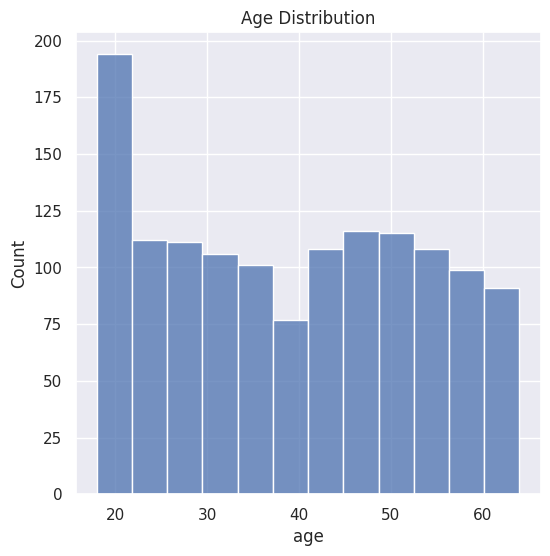

In [12]:
import seaborn as sms
import matplotlib.pyplot as plt

sms.set()
plt.figure(figsize=(6,6)) # Moved figuresize to be an argument of plt.figure()
sms.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

# ***sex distribution***

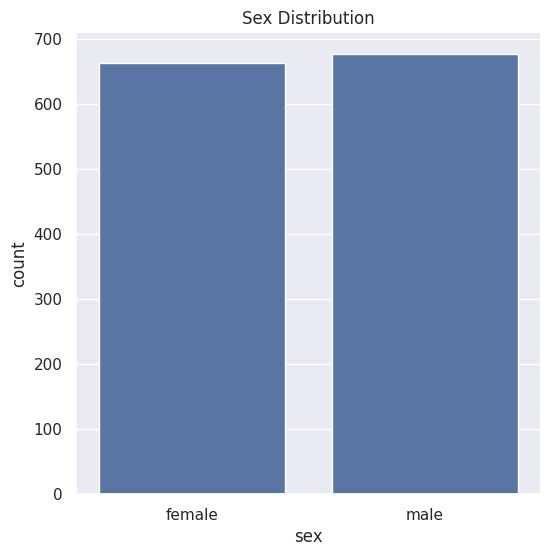

In [13]:
plt.figure(figsize=(6,6))
sms.countplot(x = 'sex', data = insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [14]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

# ***bmi distribution***

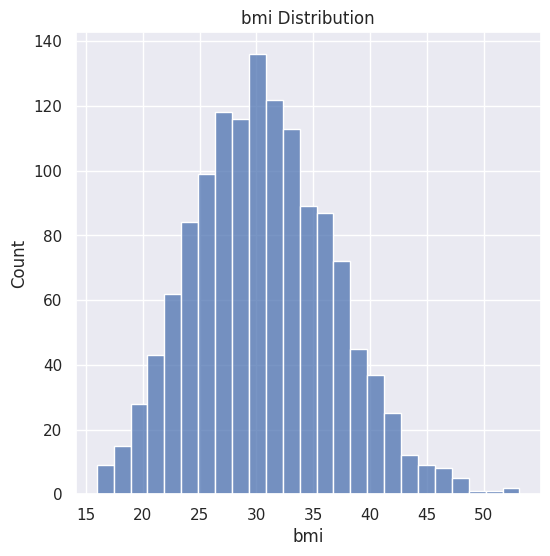

In [17]:
import seaborn as sms
import matplotlib.pyplot as plt

sms.set()
plt.figure(figsize=(6,6)) # Moved figuresize to be an argument of plt.figure()
sms.histplot(insurance_dataset['bmi'])
plt.title('bmi Distribution')
plt.show()

In [18]:
# from the insurance_dataset histogram distributionit is evident that alot of peaople are over weight i.e they are above 18-24.5 range this can futher impact their premium charges

# ***children distribution***

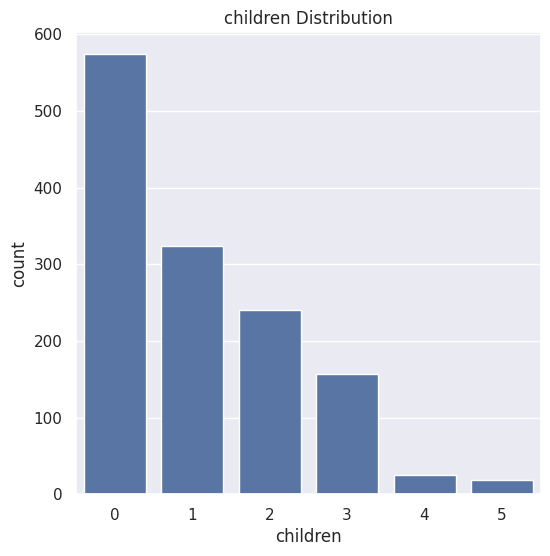

In [19]:
plt.figure(figsize=(6,6))
sms.countplot(x = 'children', data = insurance_dataset)
plt.title('children Distribution')
plt.show()

In [20]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

# ***smoker Distribution***

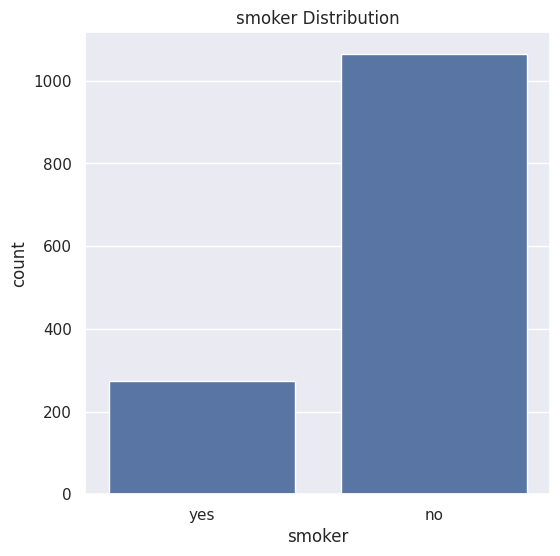

In [21]:
plt.figure(figsize=(6,6))
sms.countplot(x = 'smoker', data = insurance_dataset)
plt.title('smoker Distribution')
plt.show()

In [22]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

# ***Region Distribution***

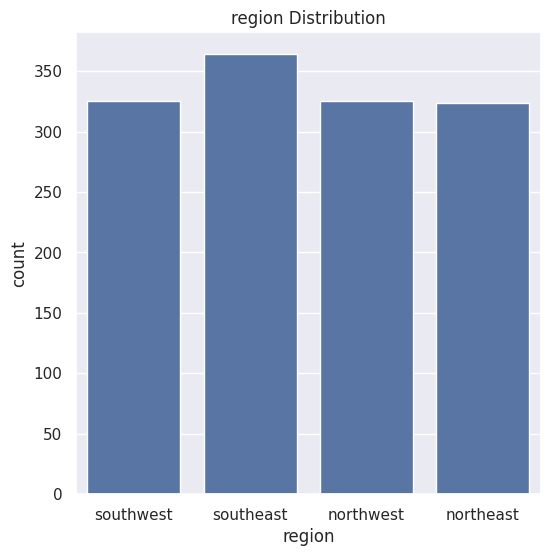

In [23]:
plt.figure(figsize=(6,6))
sms.countplot(x = 'region', data = insurance_dataset)
plt.title('region Distribution')
plt.show()

In [24]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# ***charges Distribution ***

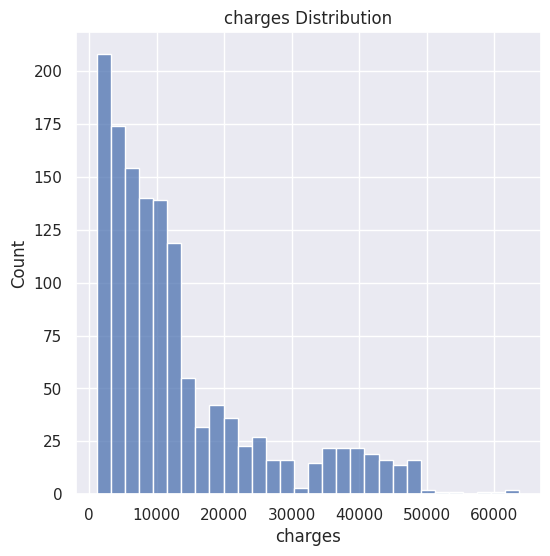

In [26]:
plt.figure(figsize=(6,6)) # Moved figuresize to be an argument of plt.figure()
sms.histplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

# **DATA PROCESSING**

# ***Encoding process***

In [27]:
#encoding categorical features using one hot encoding
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [29]:
insurance_dataset
# as we can see the string nature of the categorical data has been transformed into 1 and 0 or numerical assigness which can easily be addressed by the model

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


***Splitting the features and target***

In [31]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges'] # Removed extra space at the beginning of the line

In [32]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [33]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# ***Splitting the data into training data and Testing Data***

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(x_train.shape, x_test.shape)

(1070, 6) (268, 6)


# ***Model Training***

# *Learning Regression *

In [36]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# Model evaluation

In [37]:
#prediction on trainining data
training_data_prediction = regressor.predict(x_train)

In [38]:
# co-efficient of determination R2 value
r2_score = metrics.r2_score(y_train, training_data_prediction)
print('R squared value : ', r2_score)

R squared value :  0.751505643411174


In [39]:
#prediction on testing data
test_data_prediction = regressor.predict(x_test)

In [40]:
#R2 value
r2_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared value : ', r2_score)

R squared value :  0.7447273869684076


In [41]:
#for a good model the co efficient of determination in both the training and testing data must be almost equal to each other or the same

# ***Building a predictive system ***

In [46]:
input_data = (31,1,25.74,0,1,0)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction stage
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD', prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
